In [1]:
import os
import PyPDF2
import fitz

In [2]:
dir = 'annoted_sustainability_reports/Real_Estate'

In [3]:
highlight_list = []
rel_text = []

for file in os.listdir(dir):
    f = os.path.join(dir, file)
    print(f)
    
    doc = fitz.open(f)
    print(doc)
    result = []
    
    for page in doc:
        
        highlights = []
        annot = page.first_annot
        while annot: 
            if annot.type[0] == 8:
                all_coordinates = annot.vertices
                try: 
                    if len(all_coordinates) == 4:
                        highlight_coord = fitz.Quad(all_coordinates).rect
                        highlights.append(highlight_coord)
                    else: 
                        all_coordinates = [all_coordinates[x:x+4] for x in range(0,len(all_coordinates),4)]
                        for i in range(0, len(all_coordinates)):
                            coord = fitz.Quad(all_coordinates[i]).rect
                            highlights.append(coord)
                except:
                    print("NoneType found")
            annot = annot.next
        all_words = page.get_text_words()
        highlight_text = []
        if len(highlights) > 0:
            for h in highlights:
                sentence = []
                for w in all_words:
                    if fitz.Rect(w[0:4]).intersects(h):
                        sentence.append(w[4])
                highlight_text.append(" ".join(sentence))
        if len(highlight_text) > 0:
            result.append(" ".join(highlight_text))
    s = ""

    for r in result:
        if r is not None:
            s += r

    # Create array of highlighted sentences in the pdf
    highlighted_sentences = s.split('.')

    print(highlighted_sentences, "\n", len(highlighted_sentences))
    
    rel_text.append(highlighted_sentences)
    
    num_highlighted = len(highlighted_sentences)
    
    highlight_list.append(num_highlighted)

annoted_sustainability_reports/Real_Estate/AmericanTowerCorp_2021_Sustainability_report.pdf
Document('annoted_sustainability_reports/Real_Estate/AmericanTowerCorp_2021_Sustainability_report.pdf')
['American\xa0Tower is targeting a 40% reduction in absolute scope 1 and 2 GHG emissions by 2035 from a 2019 base year', ' American\xa0Tower is targeting a 40% reduction in indirect scope 3 value chain GHG emissions by 2035 from a 2019 base year', 'In 2021, our scope 1 emissions decreased 6', '5% to 636,157 MTCO2e and our scope 2 (market-based) MTCO2e emissions decreased 6', '6% to 486,410 MTCO2e, compared to our 2019 baseline', ' Our overall scope 1 and 2 emissions reduction of 6', '5%, compared to our 2019 baseline, is driven by several factors, including improving communications site energy efficiency, deploying renewable energy solutions and upgrading on-site energy storage systems', ' At 99% of the approximately 1,000 newly built sites and nearly 75% of the approximately 2,100 legacy site

In [4]:
# Extracting all sentences from the file 
sentences_list = []
all_text = []

for file in os.listdir(dir):
    f = os.path.join(dir,file)
    print(f)
    
    pdfFileObj = open(f, 'rb')
    pdfReader  = PyPDF2.PdfFileReader(pdfFileObj)
    
    t = ""
    
    for count in range(len(fitz.open(f))):
        pageObj = pdfReader.getPage(count)
        t += pageObj.extractText()
        
    pdfFileObj.close()
    total_sentences = t.split('.')
    print(len(total_sentences))
    
    all_text.append(total_sentences)
    
    num_sentences = len(total_sentences)
    
    sentences_list.append(num_sentences)

annoted_sustainability_reports/Real_Estate/AmericanTowerCorp_2021_Sustainability_report.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


1434
annoted_sustainability_reports/Real_Estate/Prologis_21to22_ESG_report.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


1491
annoted_sustainability_reports/Real_Estate/CrownCastle_2021_ESG_report.pdf
160


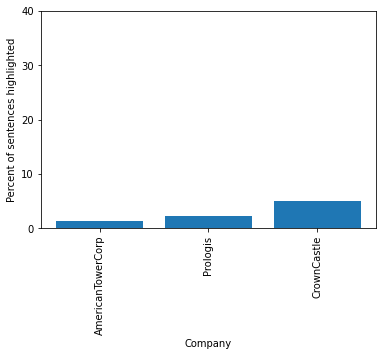

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import glob
y = []

x = ["AmericanTowerCorp", "Prologis", "CrownCastle"]

i = 0

for file in os.listdir(dir):
    y.append(100 * (highlight_list[i])/sentences_list[i])
    i = i+1

plt.bar(x, y, width = 0.8)
plt.xticks(rotation='vertical')
plt.xlabel("Company")
plt.ylabel("Percent of sentences highlighted")
plt.yticks(np.arange(0, 50, 10))
plt.show()

In [9]:
import pandas as pd

series = pd.Series(y)
series.describe()

count    3.000000
mean     2.867549
std      1.925806
min      1.255230
25%      1.801324
50%      2.347418
75%      3.673709
max      5.000000
dtype: float64

In [10]:
#storing variable so they can be called between notebooks (for aggregate analysis, test/train data sets, and modeling later on)

Real_Estate_reltext = rel_text
Real_Estate_alltext = all_text

%store Real_Estate_reltext
%store Real_Estate_alltext

Stored 'Real_Estate_reltext' (list)
Stored 'Real_Estate_alltext' (list)
